# Data Analysis on Top Youtubers

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [98]:
#Reading the youtube dataset
yutube=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\Carrers Intern\\youtubers_df.csv")
yutube

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


# Data Cleaning and Exploration

In [129]:
yutube.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [135]:
yutube.shape

(1000, 9)

In [136]:
yutube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   1000 non-null   object 
 3   Subscribers  1000 non-null   int32  
 4   Country      1000 non-null   object 
 5   Visits       1000 non-null   float64
 6   Likes        1000 non-null   float64
 7   Comments     1000 non-null   float64
 8   Links        1000 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 66.5+ KB


In [132]:
#Names of columns
yutube.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [137]:
#Renaming 'Suscribers' column to 'Subcribers'
yutube.rename(columns={'Suscribers':'Subscribers'}, inplace=True)

In [138]:
#Checking whether the column name 'Suscriber' have successfully renamed
yutube.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [139]:
#Changing the data type of 'Subscribers' column from float to int
yutube['Subscribers']=yutube['Subscribers'].astype(int)

In [141]:
#Checking if 'Subscribers' data type have successfully changed
yutube.dtypes

Rank             int64
Username        object
Categories      object
Subscribers      int32
Country         object
Visits         float64
Likes          float64
Comments       float64
Links           object
dtype: object

In [106]:
#Checking for missing values
yutube.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [107]:
#Replacing missing 'Categories' with 'Unknown'
yutube.fillna('Unknown', inplace=True)

In [108]:
#Checking if missing values have been successfully replaced
yutube.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [111]:
# Checking the different Categories we have 
yutube['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', 'Unknown',
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación,

# Checking for outliers on 'Subscribers'

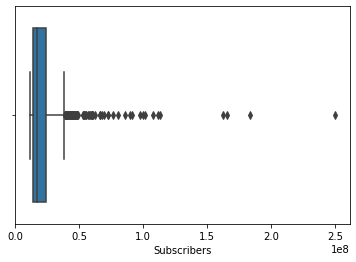

In [208]:
sns.boxplot(x=yutube['Subscribers'])
plt.show()

# Removing Outliers on 'Subscribers'

In [160]:
#Removing for subscribers
col1 = 'Subscribers'
# Calculate the interquartile range (IQR)
Q1_s = yutube[col1].quantile(0.25)
Q3_s = yutube[col1].quantile(0.75)
IQR_s = Q3 - Q1

In [161]:
IQR_s

28178.25

In [178]:
# Defining the lower and upper bounds for outliers
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s

In [179]:
# Filtering the dataframe to remove outliers
yutube_no_outliers_s = yutube[(yutube[col1] >= lower_bound_s) & (yutube[col1] <= upper_bound_s)]

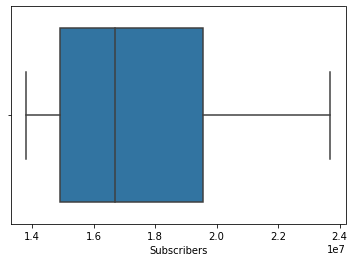

In [207]:
# Plotting the boxplot without outliers
sns.boxplot(x=yutube_no_outliers_s[col1])
plt.show()

# Checking for outliers on 'Visits' column

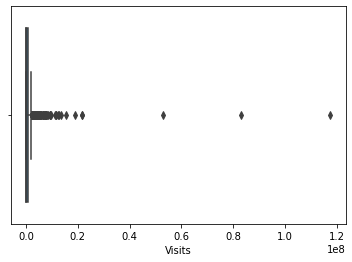

In [206]:
sns.boxplot(x=yutube['Visits'])
plt.show()

# Removing outliers on 'Visits'

In [174]:
#Removing for Visits
col2 = 'Visits'
# Calculate the interquartile range (IQR)
Q1_v = yutube[col2].quantile(0.25)
Q3_v = yutube[col2].quantile(0.75)
IQR_v = Q3_v - Q1_v

In [175]:
IQR_v

833500.0

In [182]:
# Define the lower and upper bounds for outliers
lower_bound_v = Q1_v - 1.5 * IQR_v
upper_bound_v = Q3_v + 1.5 * IQR_v

In [183]:
# Filter the dataframe to remove outliers
yutube_no_outliers_v = yutube[(yutube[col2] >= lower_bound_v) & (yutube[col2] <= upper_bound_v)]

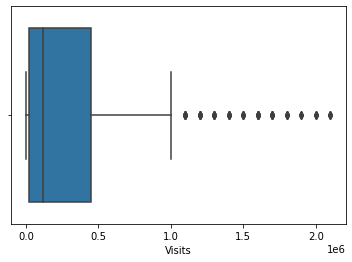

In [205]:
# Plot the boxplot without outliers
sns.boxplot(x=yutube_no_outliers_v[col2])
plt.show()

# Checking for outliers on 'Likes' Column

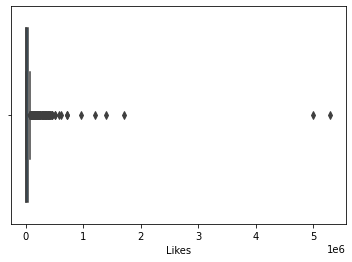

In [204]:
sns.boxplot(x=yutube['Likes'])
plt.show()

# Removing outliers on 'Likes'

In [188]:
#Removing for Likes
col3 = 'Likes'
# Calculate the interquartile range (IQR)
Q1_l = yutube[col3].quantile(0.25)
Q3_l = yutube[col3].quantile(0.75)
IQR_l = Q3_l - Q1_l

In [189]:
IQR_l

28178.25

In [190]:
# Define the lower and upper bounds for outliers
lower_bound_l = Q1_l - 1.5 * IQR_l
upper_bound_l = Q3_l + 1.5 * IQR_l

In [191]:
# Filter the dataframe to remove outliers
yutube_no_outliers_l = yutube[(yutube[col3] >= lower_bound_l) & (yutube[col3] <= upper_bound_l)]

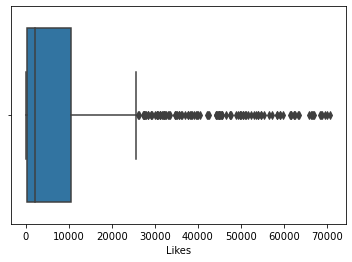

In [203]:
# Plot the boxplot without outliers
sns.boxplot(x=yutube_no_outliers_l[col3])
plt.show()

# Checking for outliers on 'Comments' column

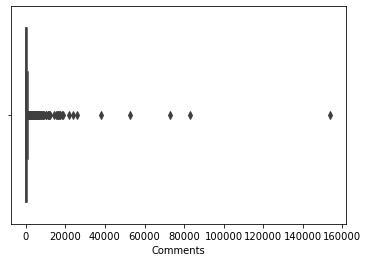

In [202]:
sns.boxplot(x=yutube['Comments'])
plt.show()

# Removing outliers on 'Comments' column

In [196]:
#Removing for Visits
col4 = 'Comments'
# Calculate the interquartile range (IQR)
Q1_c = yutube[col4].quantile(0.25)
Q3_c = yutube[col4].quantile(0.75)
IQR_c = Q3_c - Q1_c

In [197]:
IQR_c

470.0

In [198]:
# Define the lower and upper bounds for outliers
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c

In [199]:
# Filter the dataframe to remove outliers
yutube_no_outliers_c = yutube[(yutube[col4] >= lower_bound_c) & (yutube[col4] <= upper_bound_c)]

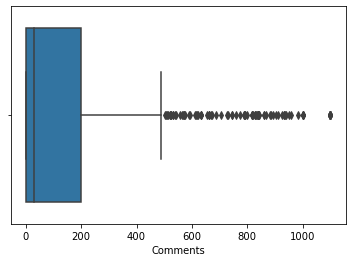

In [201]:
# Plot the boxplot without outliers
sns.boxplot(x=yutube_no_outliers_c[col4])
plt.show()

# Shape of the Dataframe before and after removig outliers

In [222]:
#Before removing outliers
yutube.shape

(1000, 10)

In [223]:
#Before removing outliers
yutube_no_outliers.shape

(921, 9)

# Performance Metrics

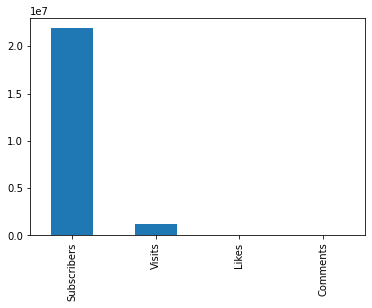

In [209]:
average_metrics = yutube[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics.plot(kind='bar')
plt.show()

# Content Categories

In [211]:
category_dist=yutube['Categories'].value_counts()
display(category_dist)

Unknown                               306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor             

# Kmeans clustering to check high performance

In [216]:
#This ensures that the values have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(yutube[['Subscribers', 'Visits', 'Likes', 'Comments']])
kmeans = KMeans(n_clusters=5)
yutube['cluster'] = kmeans.fit_predict(scaled_metrics)

In [217]:
# Identifying top-performing content creators
top_performers = yutube[yutube['cluster'] == 1]

In [218]:
top_performers

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,cluster
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,1
136,137,MrBeast2,Vlogs diarios,31300000,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...,1


In [225]:
yutube_corr=yutube[['Subscribers', 'Visits', 'Likes', 'Comments']].corr()
yutube_corr

,Subscribers,Visits,Likes,Comments
Subscribers,1.000000,0.245203,0.211639,0.036350
Visits,0.245203,1.000000,0.950470,0.324067
Likes,0.211639,0.950470,1.000000,0.325911
Comments,0.036350,0.324067,0.325911,1.000000


<AxesSubplot:>

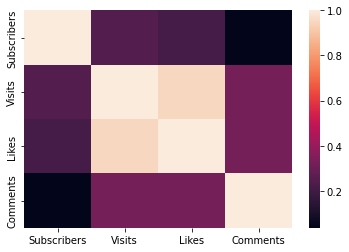

In [226]:
sns.heatmap(yutube_corr)

In [229]:
top_categories=category_dist>=36
top_categories

Unknown                                True
Música y baile                         True
Películas, Animación                   True
Música y baile, Películas              True
Vlogs diarios                          True
Noticias y Política                    True
Películas, Humor                      False
Animación, Videojuegos                False
Animación, Juguetes                   False
Animación, Humor                      False
Películas                             False
Educación                             False
Animación                             False
Videojuegos                           False
Videojuegos, Humor                    False
Música y baile, Animación             False
Ciencia y tecnología                  False
Comida y bebida                       False
Humor                                 False
Juguetes                              False
Películas, Juguetes                   False
Películas, Videojuegos                False
Deportes                        

In [230]:
s=yutube.groupby('Country')['Subscribers']
s